<a href="https://colab.research.google.com/github/SonnxDev/QUIMICASM/blob/main/Cin%C3%A9tica_qu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRIMERO HALLAREMOS LAS ESTRUCTURAS CIS Y TRANS DEL: F/C=C/C :



import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(0,'Cis')
diagram.add_level(8.5,'TS',color='g')
diagram.add_level(5,'trans')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel

--------------
semilla: https://github.com/rdkit/rdkit/issues/2575

m2 = Chem.MolFromSmiles(com)
m3 = Chem.AddHs(m2)
AllChem.EmbedMolecule(m3, useRandomCoords=False, randomSeed = 0)
Chem.MolToMolFile(m3,'CheckMol'+str(index)+'.sdf')

In [ ]:
!pip install rdkit
!pip install pyscf
!pip install matplotlib

In [ ]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True


------------------------------------------------------------------------
CIS DE LA MOLÉCULA / ENERGÍA

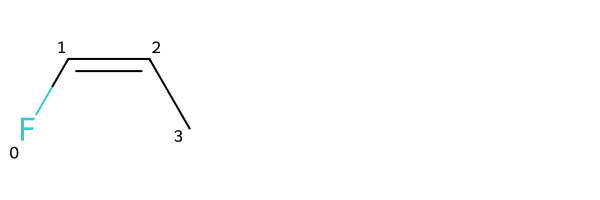

In [ ]:
# Pegamos el smiles
smiles = "F\C=C/C"

# Convertimos con RDKIT
mol = Chem.MolFromSmiles(smiles)

# Dibujamos y ampliamos la estructura
Draw.MolsToGridImage([mol])
Draw.MolsToGridImage([mol], subImgSize=(200,200))

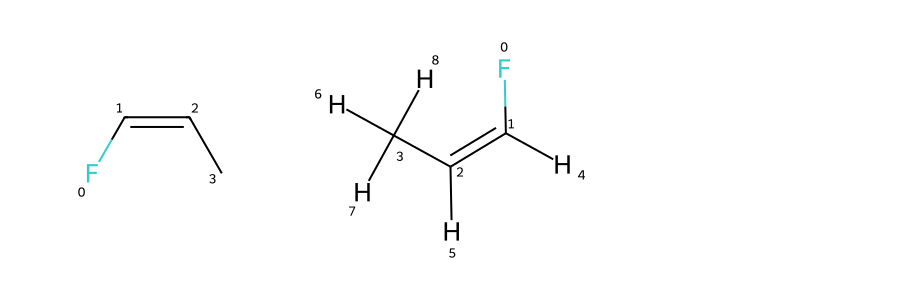

In [ ]:
# Añadimos hidrógenos
mol_h = Chem.AddHs(mol)

# Mostramos las estructuras
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h)

# look at the molecule again
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.1808    1.5005    0.5321 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2955    0.2366    0.0442 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2498   -0.5351   -0.2253 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1141    0.0312    0.0267 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2866   -0.2066   -0.1511 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3984   -1.5377   -0.6138 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8891   -0.4676   -0.6070 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3164   -0.1516    1.1146 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0915    1.1301   -0.1204 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [ ]:
Chem.MolToXYZFile(mol_h,"cisbuteno.xyz")

3D DEL CIS-BUTENO

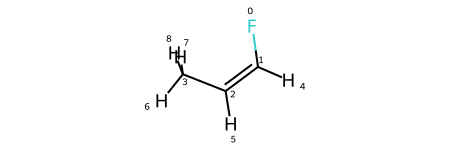

In [ ]:
# creamos la molécula 3D del buteno
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "cisbuteno.xyz")
mol

ENERGÍA DEL CIS-BUTENO

In [ ]:
from pyscf import gto, scf

In [ ]:
mol = gto.M(atom="cisbuteno.xyz")

In [ ]:
# cuchillo de pan
mol.basis = "3-21G"

# función molfg
mf = mol.KS()
mf.xc = 'b3lyp'
mf.kernel()

converged SCF energy = -214.251735751706


-214.25173575170606

------------------------------------------------------------------------
TRANS DE LA MOLÉCULA / ENERGÍA

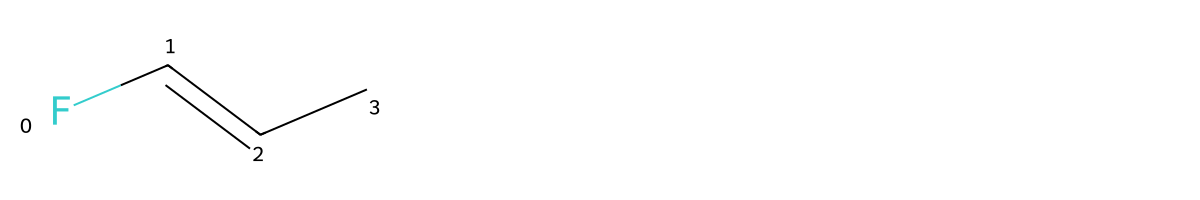

In [ ]:
# Pegamos el smiles
smiles = "F/C=C/C"

# Convertimos con RDKIT
mol = Chem.MolFromSmiles(smiles)

# Dibujamos y ampliamos la estructura
Draw.MolsToGridImage([mol])
Draw.MolsToGridImage([mol], subImgSize=(400,200))

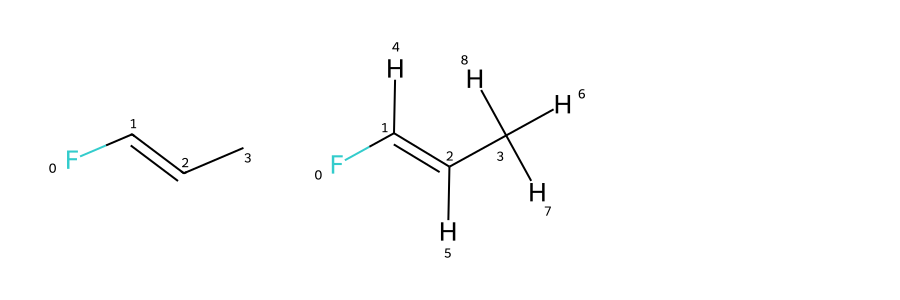

In [ ]:
# Añadimos hidrógenos
mol_h = Chem.AddHs(mol)

# Mostramos las estructuras
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h)

# look at the molecule again
print(Chem.MolToMolBlock(mol_h))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5289    0.2634    0.0054 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3000   -0.2679   -0.0825 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2363    0.4823    0.0960 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1301   -0.0948    0.0011 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1718   -1.3070   -0.2986 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3241    1.5582    0.3207 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1572   -1.0193   -0.6124 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7698    0.6871   -0.4758 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5041   -0.3020    1.0459 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



In [ ]:
Chem.MolToXYZFile(mol_h,"transbuteno.xyz")

3D DEL TRANSBUTENO

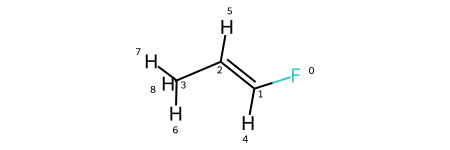

In [ ]:
# creamos la molécula 3D del buteno
smiles = "F/C=C/C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "transbuteno.xyz")
mol

ENERGÍA DEL TRANSBUTENO

In [ ]:
mol = gto.M(atom="transbuteno.xyz")
# cuchillo de pan
mol.basis = "3-21G"

# función molfg
mf = mol.KS()
mf.xc = 'b3lyp'
mf.kernel()

converged SCF energy = -214.251256561266


-214.2512565612658

------------------------------------------------------------------------
ROTACIÓN DE 90 DEL CIS / ENERGÍA / TRANSITIVO

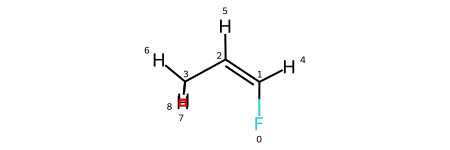

In [ ]:
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "cisbuteno.xyz")
mol

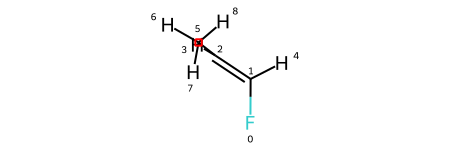

In [ ]:
# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),0,1,2,3,90.0)

# save the new conformer
Chem.MolToXYZFile(mol, "cis90.xyz")

# Looks like it is set to 90
mol

ENERGÍA TRANSITIVA

In [ ]:
mol = gto.M(atom="cis90.xyz")
# cuchillo de pan
mol.basis = "3-21G"

# función molfg
mf = mol.KS()
mf.xc = 'b3lyp'
mf.kernel()

converged SCF energy = -214.086635725512


-214.08663572551208

-----------------------------------------------------
GRÁFICO DE LAS ENERGÍAS

In [ ]:
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-rogwl6qs
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-rogwl6qs
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9465 sha256=6a07ef72c0d6daf4d6d1e438aa1807bd8e8745473b98699f0d102b9d031f9022
  Stored in directory: /tmp/pip-ephem-wheel-cache-swlea8vq/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


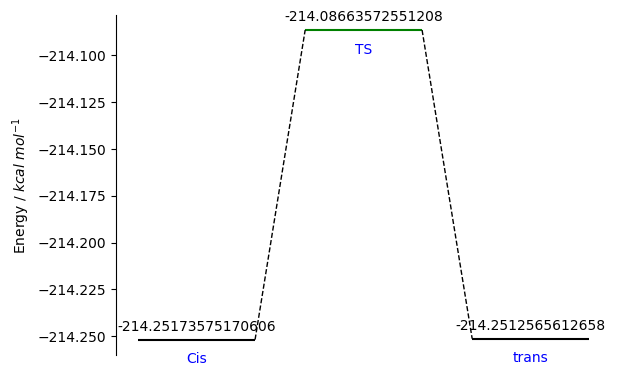

In [ ]:
import matplotlib.pyplot as plt
from energydiagram import ED
diagram = ED()
diagram.add_level(-214.25173575170606,'Cis')
diagram.add_level(-214.08663572551208,'TS',color='g')
diagram.add_level(-214.2512565612658,'trans')
diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy / $kcal$ $mol^{-1}$") # this is the default ylabel

-----------------------------------------------------

¿REACCIÓN ENDOTÉRMICA O EXOTÉRMICA?

In [ ]:
cis = -214.25173575170606
trans = -214.2512565612658
TS = -214.08663572551208
reacc = trans - cis
if (trans - cis > 0):
  print(reacc,"La reacción es endotérmica")
else:
  print("La reacción es exotérmica")

0.0004791904402736691 La reacción es endotérmica
